# Task 1

### 1.1

In [1]:
import pandas as pd
df = pd.read_csv('HW1_var_1.csv', sep=';')

In [2]:
df.head()

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1,1000001,Свободная форма с печатью работодателя,Другое,1,0.35,женский,0.0,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000021,Поступление зарплаты на счет,Лечение,1,0.16,женский,0.0,0,высшее,...,3.0,26.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1000041,Поступление зарплаты на счет,Ремонт,1,0.15,мужской,0.0,0,среднее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1000061,2НДФЛ,Отпуск,1,0.43,женский,1.0,0,высшее,...,2.0,3.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1000081,2НДФЛ,Ремонт,1,0.29,мужской,0.0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Номер варианта         10243 non-null  int64  
 1   ID                     10243 non-null  int64  
 2   INCOME_BASE_TYPE       10177 non-null  object 
 3   CREDIT_PURPOSE         10243 non-null  object 
 4   INSURANCE_FLAG         10243 non-null  int64  
 5   DTI                    10109 non-null  float64
 6   SEX                    10243 non-null  object 
 7   FULL_AGE_CHILD_NUMBER  10242 non-null  float64
 8   DEPENDANT_NUMBER       10243 non-null  int64  
 9   EDUCATION              10243 non-null  object 
 10  EMPL_TYPE              10238 non-null  object 
 11  EMPL_SIZE              10109 non-null  object 
 12  BANKACCOUNT_FLAG       7917 non-null   float64
 13  Period_at_work         7916 non-null   float64
 14  age                    7917 non-null   float64
 15  EM

In [4]:
import numpy as np
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'unique_values': df.nunique(),
    'num_zeros': (df == 0).sum(),
    'num_nulls': df.isna().sum(),
})

summary['pct_zeros'] = (summary['num_zeros'] / len(df) * 100).round(2)
summary['pct_nulls'] = (summary['num_nulls'] / len(df) * 100).round(2)

num_stats = df.describe().T[['mean', '50%', 'std', 'min', 'max']].rename(columns={'50%': 'median'})
summary = summary.join(num_stats, how='left')

summary.head(15)

,dtype,unique_values,num_zeros,num_nulls,pct_zeros,pct_nulls,mean,median,std,min,max
Номер варианта,int64,1,0,0,0.00,0.00,1.000000e+00,1.0,0.000000,1.00,1.00
ID,int64,10243,0,0,0.00,0.00,1.102421e+06,1102421.0,59140.874754,1000001.00,1204841.00
INCOME_BASE_TYPE,object,4,0,66,0.00,0.64,NaN,NaN,NaN,NaN,NaN
CREDIT_PURPOSE,object,10,0,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN
INSURANCE_FLAG,int64,2,3964,0,38.70,0.00,6.130040e-01,1.0,0.487086,0.00,1.00
DTI,float64,60,0,134,0.00,1.31,3.867306e-01,0.4,0.137048,0.01,0.61
SEX,object,2,0,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN
FULL_AGE_CHILD_NUMBER,float64,8,6154,1,60.08,0.01,5.516501e-01,0.0,0.775011,0.00,7.00
DEPENDANT_NUMBER,int64,4,10211,0,99.69,0.00,4.002734e-03,0.0,0.077070,0.00,3.00
EDUCATION,object,9,0,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN


**Conclusion**

The table is clean in terms of basic attributes, but there are gaps in the employment block (age, Period_at_work, BANKACCOUNT_FLAG). There are constant attributes (Номер варианта) -> it can be deleted.

### 1.2

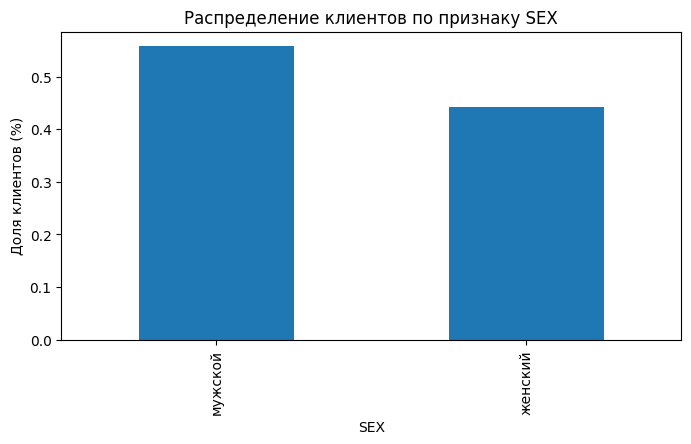

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

cat_cols = ['SEX']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts(dropna=False, normalize=True).sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.ylabel('Доля клиентов (%)')
    plt.xlabel(col)
    plt.show()

Men predominate in the sample ≈56%, with women accounting for approximately 44%.

The gender distribution is relatively balanced, but the slight predominance of male respondents may influence credit goals and income type.

Gender can be used as a categorical factor for further segmentation.

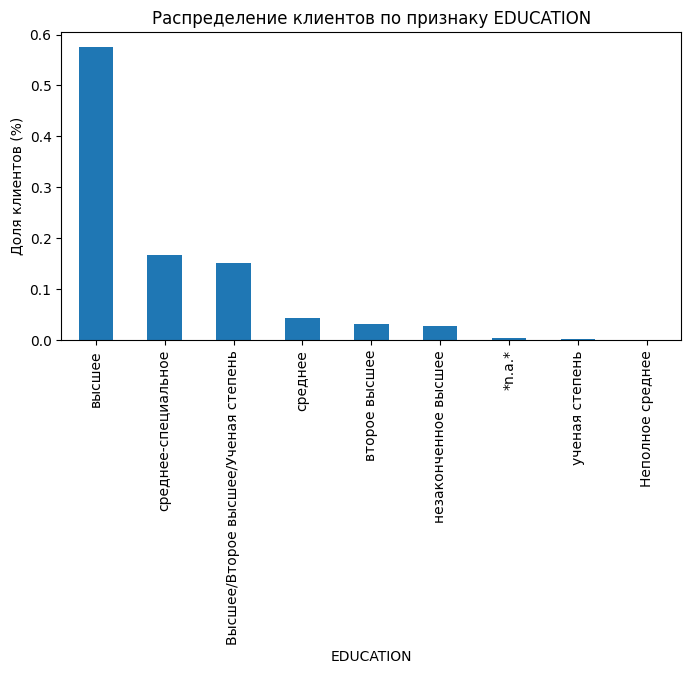

In [6]:
cat_cols = ['EDUCATION']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts(dropna=False, normalize=True).sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.ylabel('Доля клиентов (%)')
    plt.xlabel(col)
    plt.show()

- More than half of clients ≈58% have a higher education.

- This is followed by ‘secondary specialised’ ≈17% and ‘higher/second higher/academic degree’ ≈15%.

- Categories with a low share (‘incomplete secondary education,’ ‘academic degree,’ ‘incomplete higher education’) account for less than 5% and can be combined into a general group called ‘other.’

- The distribution indicates a relatively educated customer base, which is potentially associated with stable incomes.

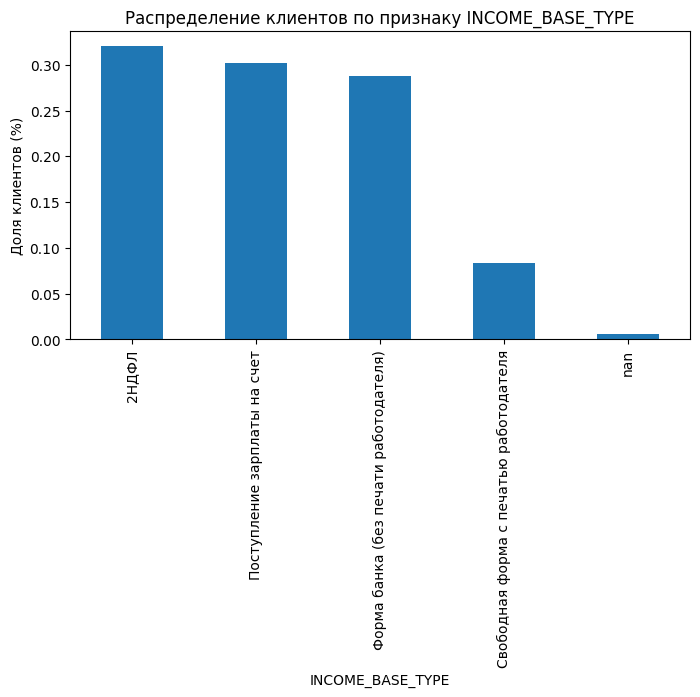

In [7]:
cat_cols = ['INCOME_BASE_TYPE']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts(dropna=False, normalize=True).sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.ylabel('Доля клиентов (%)')
    plt.xlabel(col)
    plt.show()

Main categories:

- 2-НДФЛ (≈32%)
- Зарплата на счёт (≈30%)
- Форма банка (≈29%)

Other forms ('Свободная форма') are rare (<10%). Thus, the vast majority of customers have official or semi-official proof of income, which positively characterises the basis for creditworthiness analysis.

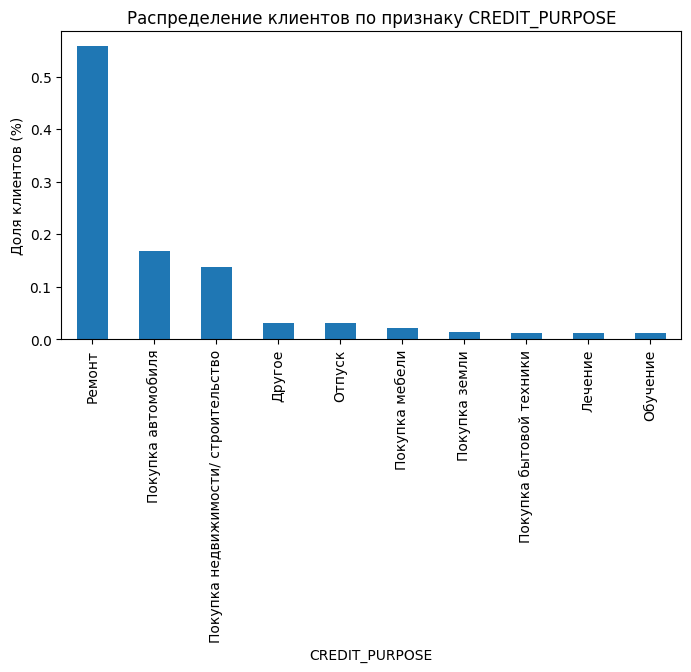

In [8]:
cat_cols = ['CREDIT_PURPOSE']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts(dropna=False, normalize=True).sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Распределение клиентов по признаку {col}')
    plt.ylabel('Доля клиентов (%)')
    plt.xlabel(col)
    plt.show()

- The most common goal is renovation (≈53%), followed by purchasing a car (≈20%) and real estate (≈15%).

- Other goals (medical treatment, holidays, education) do not exceed 5%.

- This indicates a focus on large consumer loans and home renovations, which is important for subsequent clustering by type of need.

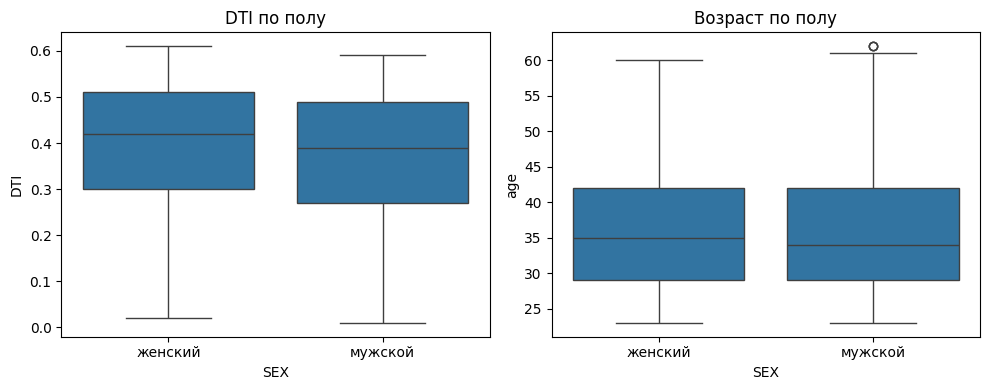

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(data=df, x='SEX', y='DTI', ax=ax[0])
ax[0].set_title('DTI по полу')

sns.boxplot(data=df, x='SEX', y='age', ax=ax[1])
ax[1].set_title('Возраст по полу')

plt.tight_layout()
plt.show()

The median age of men and women is similar (around 35 years), but the spread is slightly greater among men (there are clients over 60 years of age).

The median DTI for men is slightly higher than for women, which may indicate that men are more inclined to take out loans with higher interest rates.

Both groups have a similar DTI distribution, with few outliers.

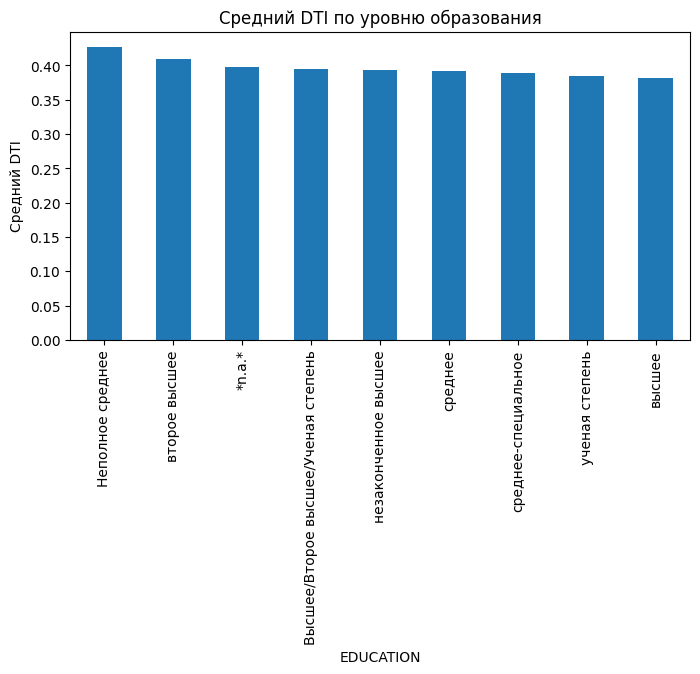

In [10]:
plt.figure(figsize=(8,4))
df.groupby('EDUCATION')['DTI'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Средний DTI по уровню образования')
plt.ylabel('Средний DTI')
plt.show()

The DTI level decreases as education increases:

- The highest DTI is among customers with incomplete secondary education (~0.43).

- The lowest is among customers with higher education (~0.37–0.38).

- This confirms the relationship between education and financial stability.

**Conclusion** 


The customer base is predominantly male, educated and with official sources of income. The main purposes of loans are car repairs and purchases. A higher level of education correlates with a lower debt-to-income ratio (DTI). Categorical characteristics are informative and will be used for segmentation.

### 1.3

In [11]:
missing = df.isna().sum().sort_values(ascending=False)
print("Пропуски:\n", missing.head(10))
print("\nКоличество дубликатов:", df.duplicated().sum())

Пропуски:
 avg_num_delay           6529
ninety_vintage          6513
Active_not_cc           6513
num_AccountActive180    6513
num_AccountActive90     6513
num_AccountActive60     6513
Active_to_All_prc       6513
numAccountActiveAll     6513
numAccountClosed        6513
sum_of_paym_months      6513
dtype: int64

Количество дубликатов: 0


In [12]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

I replaced missing values in numerical columns with the median, and in categorical columns with the mode.

The median is resistant to outliers, so it is suitable for numerical features (age, DTI, Period_at_work). For categorical features (EDUCATION, INCOME_BASE_TYPE), we take the most frequent value.

In [13]:
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

Some values (e.g., ‘Высшее’ and ‘высшее’) are considered different, converting to lowercase and removing spaces eliminates duplicates.

In [14]:
df_clean = df.drop(columns=['Номер варианта', 'ID'])

Deleted these fields because they do not contain analytical information.

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

Converted categorical variables with LabelEncoder (SEX, EDUCATION, INCOME_BASE_TYPE, CREDIT_PURPOSE) to numerical values.

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCOME_BASE_TYPE       10243 non-null  int64  
 1   CREDIT_PURPOSE         10243 non-null  int64  
 2   INSURANCE_FLAG         10243 non-null  int64  
 3   DTI                    10243 non-null  float64
 4   SEX                    10243 non-null  int64  
 5   FULL_AGE_CHILD_NUMBER  10243 non-null  float64
 6   DEPENDANT_NUMBER       10243 non-null  int64  
 7   EDUCATION              10243 non-null  int64  
 8   EMPL_TYPE              10243 non-null  int64  
 9   EMPL_SIZE              10243 non-null  int64  
 10  BANKACCOUNT_FLAG       10243 non-null  float64
 11  Period_at_work         10243 non-null  float64
 12  age                    10243 non-null  float64
 13  EMPL_PROPERTY          10243 non-null  int64  
 14  EMPL_FORM              10243 non-null  int64  
 15  FA

In [17]:
df_clean.head()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,2,0,1,0.35,0,0.0,0,3,6,1,...,0.0,10.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0.16,0,0.0,0,2,4,3,...,3.0,26.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,9,1,0.15,1,0.0,0,6,6,3,...,0.0,10.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,1,0.43,0,1.0,0,2,4,3,...,2.0,3.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,9,1,0.29,1,0.0,0,2,2,2,...,0.0,10.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Before:

In [18]:
df.shape

(10243, 44)

After:

In [19]:
df_clean.shape

(10243, 42)

**Conclusion**

After cleaning the data, gaps and duplicates were removed, categorical values were unified, and uninformative features were deleted.
Missing values of numerical variables were replaced with the median, and categorical variables were replaced with the mode.
All categorical features were encoded numerically, making the dataset suitable for clustering.
The final dataframe df_clean was obtained, ready for building a segmentation model.

### 1.4

In [20]:
df1 = df_clean.copy()

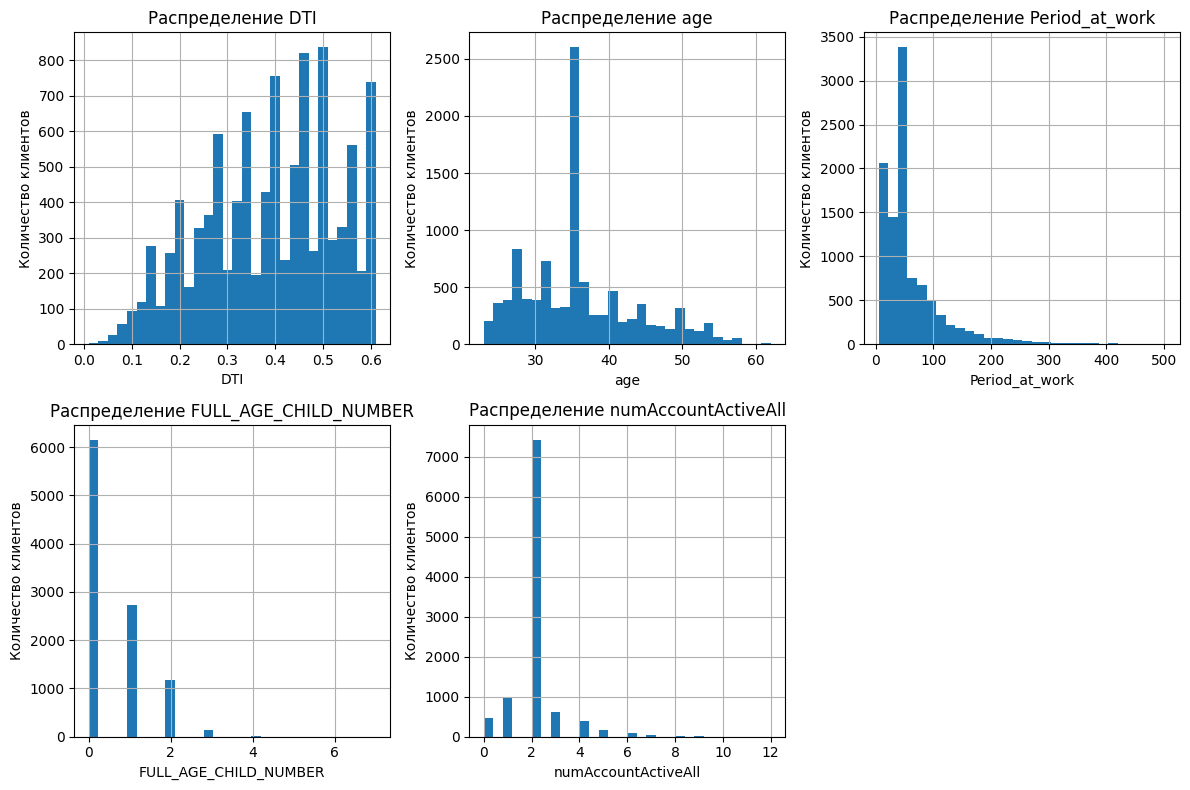

In [21]:
num_features = ['DTI', 'age', 'Period_at_work', 'FULL_AGE_CHILD_NUMBER', 'numAccountActiveAll']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    df_clean[col].hist(bins=30)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

1. The DTI distribution has moderate right-sided asymmetry: most customers are in the range of 0.3–0.5.
Low values (<0.1) are rare and may indicate customers with high solvency. The distribution is generally adequate, with no significant outliers.

2. Age
The age distribution is uneven, with a peak around 33–36 years. This suggests that the majority of borrowers are young people of middle age. There are isolated values above 60 years, which can be considered outliers (pensioners or data errors).

3. Period_at_work
The distribution is heavily skewed to the right, with most customers having less than 100 months (≈8 years) of work experience.
There are isolated cases of over 400–500 months (more than 40 years), which appear to be outliers or erroneous data.

4. FULL_AGE_CHILD_NUMBER
Most customers do not have children (≈60%), and the proportion decreases sharply as the number of children increases.
Values greater than 4 are extremely rare and are statistical outliers.

5. numAccountActiveAll
The distribution also has a strong right-sided asymmetry — most customers have 1–2 active loans.
Values above 8–10 are rare and may distort the scale when analysed.

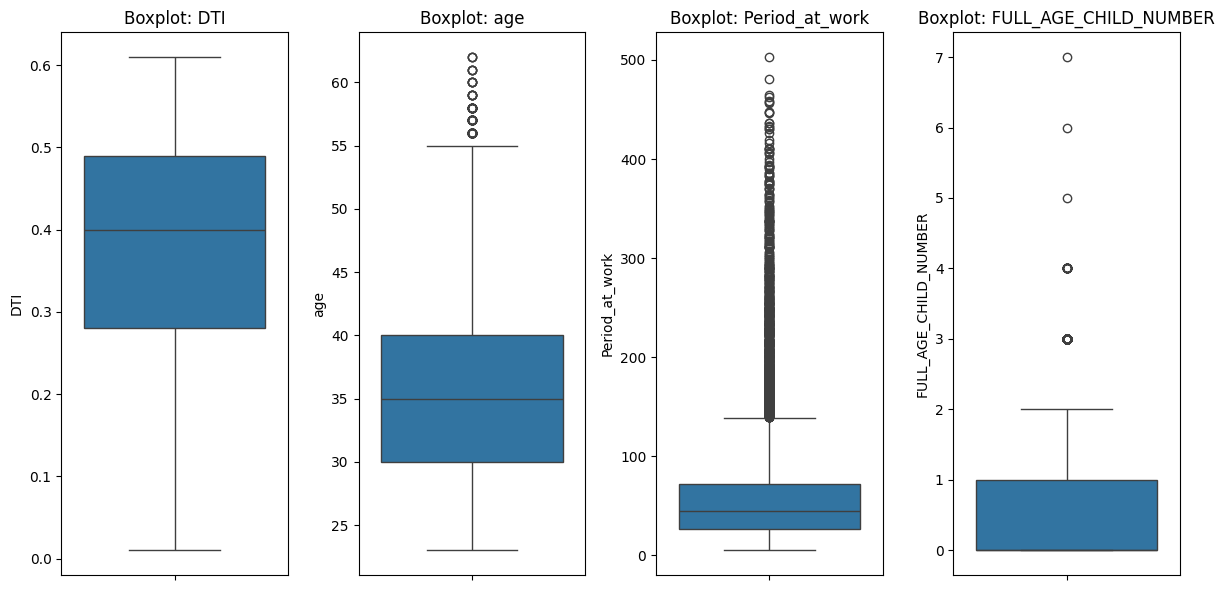

In [22]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features[:4], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

1. Boxplot DTI

The data is distributed evenly, without significant outliers.
The upper and lower whiskers fall within acceptable limits — leave without adjustment.

2. Boxplot age

Age has several points above 60 years — these are small outliers, but not critical.
You can leave them or trim them at the 1st and 99th percentiles (approximately 25–60 years).

3. Boxplot Period_at_work

There are many outliers above 150 months.
These values are likely to be erroneous (e.g., length of service > 40 years) and should be truncated.

4. Boxplot FULL_AGE_CHILD_NUMBER

There are rare values of 5–7 children — these are statistical anomalies and can be combined into the category ‘4 or more’.

In [23]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), len(outliers) / len(df) * 100

cols_to_check = ['DTI', 'age', 'Period_at_work', 'FULL_AGE_CHILD_NUMBER', 'numAccountActiveAll']
outlier_summary = pd.DataFrame(columns=['column', 'count', 'percent'])

for col in cols_to_check:
    count, percent = detect_outliers_iqr(df_clean, col)
    outlier_summary = pd.concat([outlier_summary, pd.DataFrame([[col, count, percent]], columns=['column', 'count', 'percent'])])

display(outlier_summary)

/var/folders/m_/q7bdmmy93879kj5hcdgd5gsc0000gq/T/ipykernel_12420/227749611.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_summary = pd.concat([outlier_summary, pd.DataFrame([[col, count, percent]], columns=['column', 'count', 'percent'])])


,column,count,percent
0,DTI,0,0.000000
0,age,109,1.064141
0,Period_at_work,870,8.493605
0,FULL_AGE_CHILD_NUMBER,173,1.688958
0,numAccountActiveAll,2811,27.443132


In [24]:
df_clean['age'] = df_clean['age'].clip(
    lower=df_clean['age'].quantile(0.01),
    upper=df_clean['age'].quantile(0.99)
)

df_clean['Period_at_work_log'] = np.log1p(df_clean['Period_at_work'])
df_clean['Period_at_work_log'] = df_clean['Period_at_work_log'].clip(
    upper=df_clean['Period_at_work_log'].quantile(0.99)
)

df_clean['FULL_AGE_CHILD_NUMBER'] = np.where(
    df_clean['FULL_AGE_CHILD_NUMBER'] > 4, 4, df_clean['FULL_AGE_CHILD_NUMBER']
)

df_clean['numAccountActiveAll_log'] = np.log1p(df_clean['numAccountActiveAll'])
df_clean['numAccountActiveAll_log'] = df_clean['numAccountActiveAll_log'].clip(
    upper=df_clean['numAccountActiveAll_log'].quantile(0.99)
)

Emissions analysis showed that the Period_at_work and numAccountActiveAll attributes contain a significant number of anomalous values (8–27%) due to the long right tail of the distribution. To stabilise the data, logarithmic transformation and truncation at the 99th percentile were applied, and rare categories of the FULL_AGE_CHILD_NUMBER attribute were merged.

In [25]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_clean[cols_to_check], nan_policy='omit'))
outliers_z = (z_scores > 3).any(axis=1)
print(f"Аномальных строк по z-score: {outliers_z.sum()} ({outliers_z.mean() * 100:.2f}%)")

Аномальных строк по z-score: 573 (5.59%)


The value deviates from the mean by more than 3 standard deviations.

In [26]:
num_cols = ['DTI', 'age', 'Period_at_work', 'FULL_AGE_CHILD_NUMBER', 'numAccountActiveAll']
z = np.abs(stats.zscore(df_clean[num_cols], nan_policy='omit'))
anomaly_rows = df_clean[(z > 3).any(axis=1)]

anomaly_rows[num_cols].describe()

,DTI,age,Period_at_work,FULL_AGE_CHILD_NUMBER,numAccountActiveAll
count,573.000000,573.000000,573.00000,573.000000,573.000000
mean,0.408150,42.083770,166.09075,1.254799,3.293194
std,0.132199,8.171242,136.08332,1.377136,2.352927
min,0.080000,24.000000,6.00000,0.000000,0.000000
25%,0.310000,35.000000,45.00000,0.000000,2.000000
50%,0.430000,42.000000,114.00000,1.000000,2.000000
75%,0.510000,49.000000,279.00000,3.000000,6.000000
max,0.590000,56.000000,503.00000,4.000000,12.000000


Most emissions are associated with the Period_at_work and numAccountActiveAll attributes.

In [27]:
logic_anomalies = df_clean[
    (df_clean['age'] < 18) |
    (df_clean['Period_at_work'] > df_clean['age'] * 12) |
    ((df_clean['age'] < 23) & (df_clean['Period_at_work'] > 100))
]
print(f"Количество логических аномалий: {len(logic_anomalies)}")
logic_anomalies[['age', 'Period_at_work', 'DTI']].head()

Количество логических аномалий: 1


,age,Period_at_work,DTI
111,38.0,459.0,0.5


38 years = 456 months -> an almost impossible value

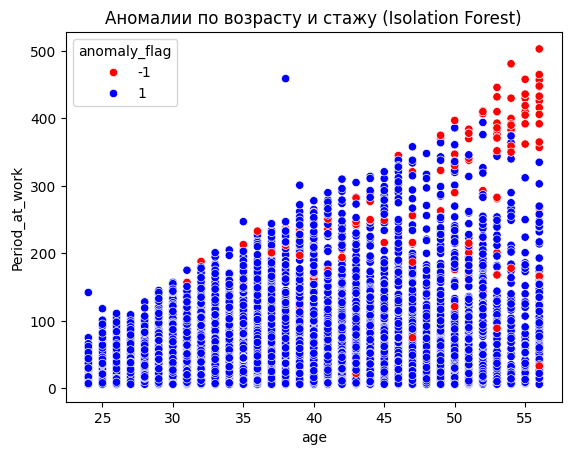

Isolation Forest нашёл 205 аномальных клиентов (2.00%)


In [28]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
df_clean['anomaly_flag'] = iso.fit_predict(df_clean[cols_to_check].fillna(0))

sns.scatterplot(data=df_clean, x='age', y='Period_at_work', hue='anomaly_flag', palette={1: 'blue', -1: 'red'})
plt.title('Аномалии по возрасту и стажу (Isolation Forest)')
plt.show()

anomaly_count = (df_clean['anomaly_flag'] == -1).sum()
print(f"Isolation Forest нашёл {anomaly_count} аномальных клиентов ({anomaly_count/len(df_clean)*100:.2f}%)")

The model confirmed the presence of 2% of rare observations that deviate from the general age–Period_at_work relationship.

In [29]:
df_clean = df_clean[df_clean['anomaly_flag'] == 1]
df_clean = df_clean[df_clean['age'] >= 18]
df_clean = df_clean[df_clean['Period_at_work'] <= df_clean['age'] * 12]

Removed outliers and anomalies.

In [30]:
df_clean = df_clean.drop(columns=[c for c in ['anomaly_flag'] if c in df_clean.columns])

features_keep = [
    'INCOME_BASE_TYPE','CREDIT_PURPOSE','INSURANCE_FLAG','SEX','EDUCATION','EMPL_TYPE','EMPL_SIZE',
    'BANKACCOUNT_FLAG','DEPENDANT_NUMBER',
    'DTI','age','FULL_AGE_CHILD_NUMBER','Period_at_work','numAccountActiveAll',
    'Period_at_work_log','numAccountActiveAll_log',
    'max90days','max60days','max30days','max21days','max14days','avg_num_delay',
    'if_zalog','num_AccountActive180','num_AccountActive90','num_AccountActive60',
    'Active_to_All_prc','numAccountClosed','sum_of_paym_months','all_credits','Active_not_cc',
    'own_closed','min_MnthAfterLoan','max_MnthAfterLoan','dlq_exist',
    'thirty_in_a_year','sixty_in_a_year','ninety_in_a_year',
    'thirty_vintage','sixty_vintage','ninety_vintage'
]
features_keep = [c for c in features_keep if c in df_clean.columns]
df_mart = df_clean[features_keep].copy()

Removed some temporary columns, like 'anomaly_flag'. Builded data mart.

Checking non-bank customers, who do not have active accounts/loans/payment history and have no arrears:

In [31]:
rows_before = len(df_mart)

mask_nonbank_B = (
    (df_mart['BANKACCOUNT_FLAG'] == 0) &
    (df_mart['numAccountActiveAll'] == 0) &
    (df_mart['all_credits'] == 0) &
    (df_mart['sum_of_paym_months'] == 0) &
    (df_mart['dlq_exist'] == 0)
)

df_mart_B = df_mart.loc[~mask_nonbank_B].copy()
print(f"Non-bank: {mask_nonbank_B.sum()} out of {rows_before} ({mask_nonbank_B.sum()/rows_before:.2%})")


Non-bank: 0 out of 10037 (0.00%)


There are no non-bank customers.

Final Date Mart:

In [32]:
df_mart

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,SEX,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,DEPENDANT_NUMBER,DTI,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,2,0,1,0,3,6,1,0.0,0,0.35,...,0.0,10.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,2,4,3,0.0,0,0.16,...,3.0,26.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,9,1,1,6,6,3,0.0,0,0.15,...,0.0,10.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,1,0,2,4,3,1.0,0,0.43,...,2.0,3.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,9,1,1,2,2,2,0.0,0,0.29,...,0.0,10.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0,9,1,0,2,6,1,0.0,0,0.59,...,0.0,10.0,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10238,3,9,1,0,7,0,1,0.0,0,0.59,...,1.0,15.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10239,0,9,1,1,2,6,3,0.0,0,0.54,...,0.0,8.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10241,3,9,1,0,3,0,3,0.0,0,0.59,...,0.0,4.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Conclusion**

- Non-informative fields have been removed: Option number, ID.

- Numerical features have been cleaned and truncated at the 99th percentile, outliers have been handled by logarithmic transformation.

- Categorical features have been converted to lowercase and encoded using LabelEncoder.

New features added:

- Period_at_work_log — logarithmic length of service;

- numAccountActiveAll_log — logarithm of the number of active accounts.

All features are converted to numeric type (int64, float64), which prepares the dataset for segmentation.


# Task 2

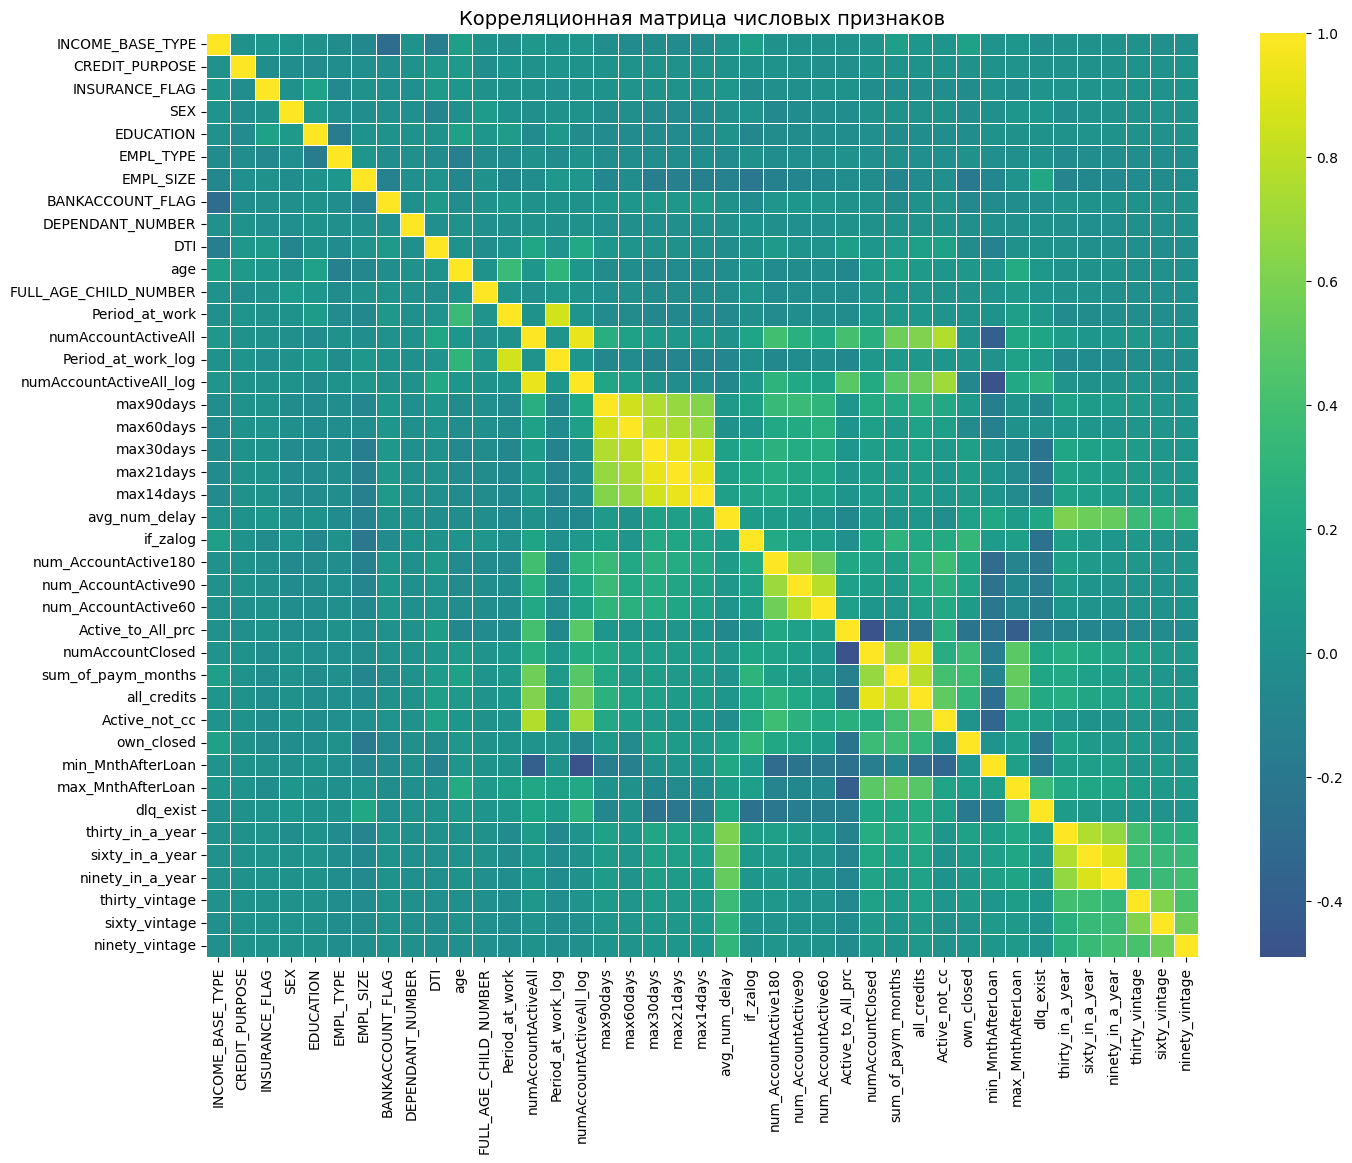

In [33]:
num_cols = df_mart.select_dtypes(include=['float64', 'int64']).columns
corr = df_mart[num_cols].corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='viridis', center=0, annot=False, linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков', fontsize=14)
plt.show()

In [34]:
threshold = 0.8
corr_pairs = corr.unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs < 1) & (abs(corr_pairs) > threshold)]

print("Высокая корреляция между признаками:")
display(high_corr)

Высокая корреляция между признаками:


max21days                max14days                  0.930620
max14days                max21days                  0.930620
numAccountActiveAll      numAccountActiveAll_log    0.925746
numAccountActiveAll_log  numAccountActiveAll        0.925746
max30days                max21days                  0.925579
max21days                max30days                  0.925579
numAccountClosed         all_credits                0.922863
all_credits              numAccountClosed           0.922863
ninety_in_a_year         sixty_in_a_year            0.886387
sixty_in_a_year          ninety_in_a_year           0.886387
Period_at_work_log       Period_at_work             0.862914
Period_at_work           Period_at_work_log         0.862914
max30days                max14days                  0.858594
max14days                max30days                  0.858594
max60days                max90days                  0.849296
max90days                max60days                  0.849296
dtype: float64

In [35]:
features_final = [
    'DTI',
    'age',
    'Period_at_work_log',
    'numAccountActiveAll_log',
    'FULL_AGE_CHILD_NUMBER',
    'all_credits',
    'max30days',
    'max90days',
    'ninety_in_a_year'
]

df_mart = df_mart[features_final].copy()

Based on correlation analysis, highly dependent features (|r| > 0.8) were removed, including duplicate delay metrics and logarithmic values. The final set for clustering includes nine key indicators that ensure independence and diversity of factors.

In [36]:
df_mart

,DTI,age,Period_at_work_log,numAccountActiveAll_log,FULL_AGE_CHILD_NUMBER,all_credits,max30days,max90days,ninety_in_a_year
0,0.35,49.0,4.691348,1.098612,0.0,5.0,2.0,3.0,0.0
1,0.16,35.0,4.564348,0.000000,0.0,3.0,0.0,0.0,0.0
2,0.15,30.0,4.488636,1.098612,0.0,5.0,0.0,1.0,0.0
3,0.43,32.0,4.812184,1.609438,1.0,8.0,0.0,1.0,0.0
4,0.29,35.0,3.828641,1.098612,0.0,5.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
10237,0.59,47.0,5.686975,1.098612,0.0,5.0,0.0,1.0,0.0
10238,0.59,42.0,5.056246,1.098612,1.0,7.0,0.0,0.0,0.0
10239,0.54,27.0,4.060443,1.609438,0.0,4.0,1.0,2.0,0.0
10241,0.59,51.0,3.135494,1.791759,0.0,8.0,2.0,6.0,0.0


In [37]:
def quantile_score(s: pd.Series, q=5, higher_is_better=True):
    r = s.rank(method='first', pct=True)
    if not higher_is_better:
        r = 1 - r
    return pd.cut(
        r, bins=np.linspace(0, 1, q+1),
        labels=[1,2,3,4,5], include_lowest=True, right=True
    ).astype(int)

r1 = quantile_score(df_mart['max90days'],       q=5, higher_is_better=False)
r2 = quantile_score(df_mart['ninety_in_a_year'],q=5, higher_is_better=False)
df_rfm = df_mart.copy()
df_rfm['R_score'] = np.rint((r1 + r2)/2).astype(int).clip(1,5)

f1 = quantile_score(df_mart['numAccountActiveAll_log'], q=5, higher_is_better=True)
f2 = quantile_score(df_mart['all_credits'],            q=5, higher_is_better=True)
df_rfm['F_score'] = np.rint((f1 + f2)/2).astype(int).clip(1,5)

m1 = quantile_score(df_mart['Period_at_work_log'], q=5, higher_is_better=True)
m2 = quantile_score(df_mart['age'],               q=5, higher_is_better=True)
m3 = quantile_score(df_mart['DTI'],               q=5, higher_is_better=False)
df_rfm['M_score'] = np.rint((m1 + m2 + m3)/3).astype(int).clip(1,5)


df_rfm['RFM_index'] = (df_rfm['R_score'] + df_rfm['F_score'] + df_rfm['M_score']) / 3.0

rfm_rank = df_rfm['RFM_index'].rank(method='first', pct=True)
df_rfm['RFM_segment'] = pd.cut(
    rfm_rank, bins=np.linspace(0,1,6),
    labels=['E','D','C','B','A'], include_lowest=True, right=True
)

share = df_rfm['RFM_segment'].value_counts(normalize=True).mul(100).sort_index()
print("Доли RFM-сегментов, %:\n", share.round(2))
print("К-во сегментов:", df_rfm['RFM_segment'].nunique(),
      "| Макс. доля сегмента, %:", share.max())

Доли RFM-сегментов, %:
 RFM_segment
E    20.00
D    20.00
C    20.01
B    20.00
A    20.01
Name: proportion, dtype: float64
К-во сегментов: 5 | Макс. доля сегмента, %: 20.005977881837204


In [38]:
cols_view = ['R_score','F_score','M_score','RFM_index',
             'DTI','age','Period_at_work_log','numAccountActiveAll_log',
             'all_credits','max90days','ninety_in_a_year']
summary_rfm = df_rfm.groupby('RFM_segment')[cols_view].mean().round(2)
summary_rfm

/var/folders/m_/q7bdmmy93879kj5hcdgd5gsc0000gq/T/ipykernel_12420/2414095722.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_rfm = df_rfm.groupby('RFM_segment')[cols_view].mean().round(2)


,R_score,F_score,M_score,RFM_index,DTI,age,Period_at_work_log,numAccountActiveAll_log,all_credits,max90days,ninety_in_a_year
RFM_segment,,,,,,,,,,,
E,3.05,1.84,2.11,2.34,0.42,31.09,3.22,0.86,3.87,1.49,0.05
D,3.11,2.82,2.48,2.81,0.42,33.17,3.50,1.05,5.07,1.18,0.02
C,2.75,3.27,2.98,3.00,0.40,35.59,3.80,1.11,5.33,1.17,0.02
B,3.15,3.13,3.47,3.25,0.37,38.03,4.02,1.12,5.41,1.15,0.02
A,2.89,3.96,3.98,3.61,0.33,40.66,4.29,1.21,6.31,1.06,0.01


/var/folders/m_/q7bdmmy93879kj5hcdgd5gsc0000gq/T/ipykernel_12420/603743820.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_summary = df_rfm.groupby('RFM_segment')[['R_score','F_score','M_score']].mean().reset_index()


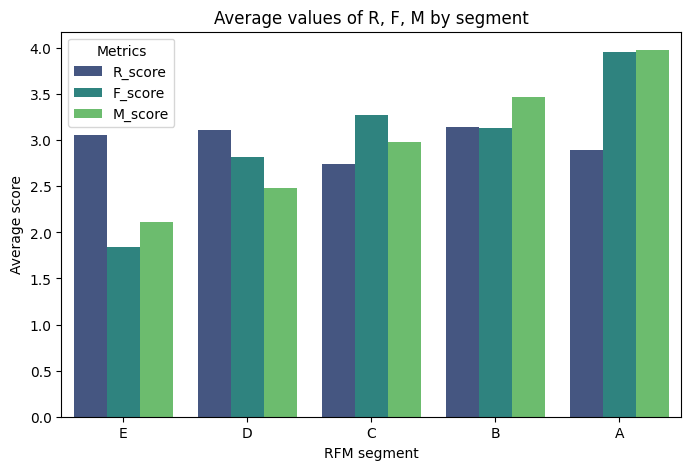

In [39]:
rfm_summary = df_rfm.groupby('RFM_segment')[['R_score','F_score','M_score']].mean().reset_index()

rfm_summary_melted = rfm_summary.melt(id_vars='RFM_segment', var_name='Показатель', value_name='Средний балл')

plt.figure(figsize=(8,5))
sns.barplot(data=rfm_summary_melted, x='RFM_segment', y='Средний балл', hue='Показатель', palette="viridis")
plt.title('Average values of R, F, M by segment')
plt.xlabel('RFM segment')
plt.ylabel('Average score')
plt.legend(title='Metrics')
plt.show()

The average values of R, F, and M differ between segments, confirming the success of segmentation:

- Segment A is characterised by the highest F_score and M_score values, indicating high customer activity and significant financial potential.

- Segment B demonstrates moderately high values for all three metrics, reflecting stable and reliable customers.

- Segment C has average values corresponding to typical customers without any specific characteristics.

- Segment D shows high reliability (R_score) but relatively low activity and potential.

- Segment E has the lowest F_score and M_score values, indicating low customer engagement and activity.

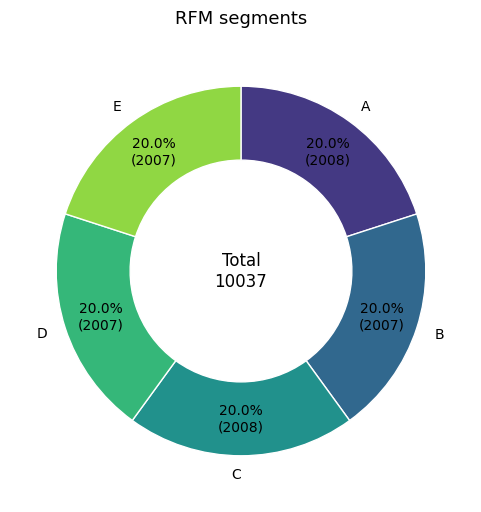

In [40]:
order = ['A','B','C','D','E']
seg_counts = df_rfm['RFM_segment'].value_counts().reindex(order, fill_value=0)
seg_pct = (seg_counts / seg_counts.sum() * 100).round(2)

colors = sns.color_palette("viridis", n_colors=len(order))

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    seg_counts,
    labels=order,
    autopct=lambda p: f"{p:.1f}%\n({int(round(p/100*seg_counts.sum()))})",
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor="white"),
    pctdistance=0.8
)

ax.text(0, 0, f"Total\n{seg_counts.sum()}", ha='center', va='center', fontsize=12)
ax.set_title("RFM segments", pad=12, fontsize=13)
for t in autotexts: t.set_fontsize(10)
plt.show()

The distribution of customers across segments is uniform: each segment (A–E) contains approximately 20% of customers. This indicates that the quantile partitioning is working correctly and that there is no dominant cluster.

**Conclusion**

Segment A — VIP and loyal customers: have the highest F_score and M_score values, low DTI and long service history. These are reliable and financially stable customers with high engagement.

Segment B — active and stable customers: slightly lower scores than A, but also demonstrate good activity and low risk.

Segment C — average level of engagement: customers with moderate scores, no problems, but do not bring high profits — they can be stimulated with additional offers.

Segment D — dormant or inactive customers: average or low M_score values, but good reliability (R_score) — potentially safe, but require activation.

Segment E — least valuable or risky customers: low F_score and M_score values, high DTI and minimal experience — high risk and low profitability.

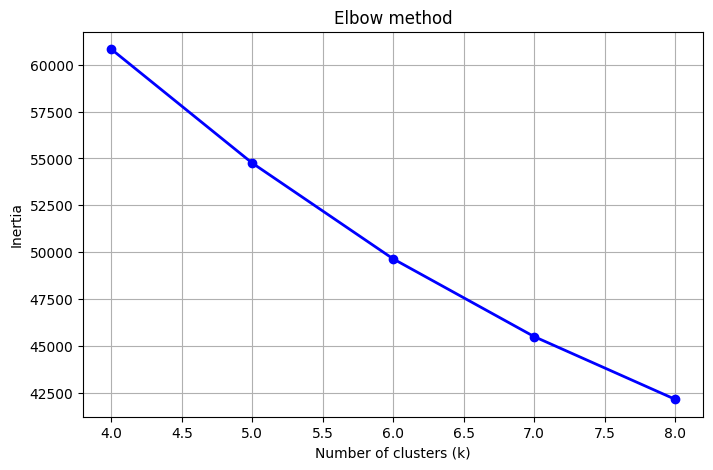

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

numeric_cols = df_mart.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_mart[numeric_cols])

inertia = []
K_range = range(4, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', linewidth=2)
plt.title('Elbow method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

The graph shows a gradual decrease in inertia without any obvious sharp breaks, but starting from k=6–7, the rate of decrease slows down. This suggests that adding more clusters after 7 gives minimal improvement in quality. The optimal value of k can be estimated to be in the range of 6–7

k=4: silhouette=0.157
k=5: silhouette=0.189
k=6: silhouette=0.200
k=7: silhouette=0.209
k=8: silhouette=0.199


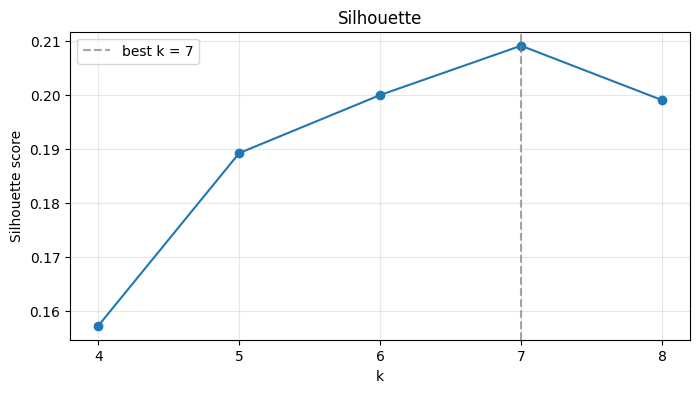

In [42]:
from sklearn.metrics import silhouette_score
X = StandardScaler().fit_transform(df_mart.select_dtypes(['int64','float64']))

k_range = range(4, 9)
sil_scores = []

for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42, n_init=50).fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    print(f"k={k}: silhouette={sil:.3f}")


best_idx = int(np.argmax(sil_scores))
best_k = list(k_range)[best_idx]

plt.figure(figsize=(8,4))
plt.plot(list(k_range), sil_scores, marker='o')
plt.axvline(best_k, ls='--', color='gray', alpha=0.7, label=f"best k = {best_k}")
plt.title("Silhouette")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.xticks(list(k_range))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

The silhouette index reaches its maximum at k=7, which indicates the best cluster separation at this number. With a further increase in the number of clusters, the metric value begins to decrease, indicating excessive data division

k=4: Davies–Bouldin=1.715
k=5: Davies–Bouldin=1.525
k=6: Davies–Bouldin=1.430
k=7: Davies–Bouldin=1.386
k=8: Davies–Bouldin=1.345


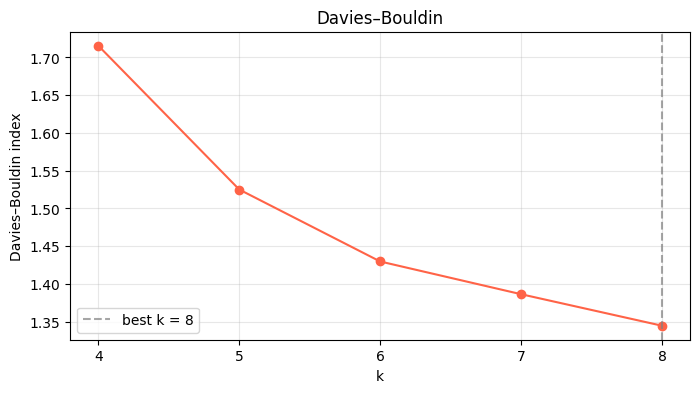

In [43]:
from sklearn.metrics import davies_bouldin_score
X = StandardScaler().fit_transform(df_mart.select_dtypes(['int64','float64']))

k_range = range(4, 9)
db_scores = []

for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42, n_init=50).fit_predict(X)
    db = davies_bouldin_score(X, labels)
    db_scores.append(db)
    print(f"k={k}: Davies–Bouldin={db:.3f}")

best_idx = int(np.argmin(db_scores))
best_k = list(k_range)[best_idx]

plt.figure(figsize=(8,4))
plt.plot(list(k_range), db_scores, marker='o', color='tomato')
plt.axvline(best_k, ls='--', color='gray', alpha=0.7, label=f"best k = {best_k}")
plt.title("Davies–Bouldin")
plt.xlabel("k")
plt.ylabel("Davies–Bouldin index")
plt.xticks(list(k_range))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

The Davies Bouldin shows a minimum value at k=8, indicating less overlap between clusters. However, the difference between k=7 and k=8 is insignificant, so for practical purposes, a range of 7–8 clusters can be considered optimal, with k=7 giving more balanced results across all metrics.

So, I will use seven clusters

In [44]:
X = df_mart.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=7, random_state=42, n_init=50)
df_mart['Cluster'] = kmeans.fit_predict(X_scaled)

print(df_mart['Cluster'].value_counts(normalize=True).sort_index())

Cluster
0    0.081399
1    0.281459
2    0.027199
3    0.373817
4    0.023413
5    0.159311
6    0.053402
Name: proportion, dtype: float64


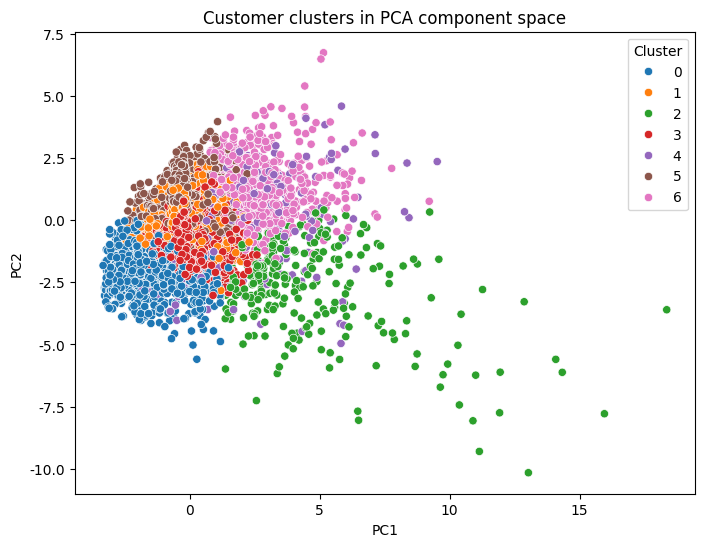

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_mart['Cluster'], palette='tab10')
plt.title('Customer clusters in PCA component space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


The graph shows that the clusters are fairly clearly separated, especially the second green cluster, which stands out visually from the main mass of customers. The other clusters (0, 1, 3, 5, 6) partially overlap, indicating similar customer characteristics, but the presence of separate areas shows that the K-Means algorithm has successfully identified distinct groups

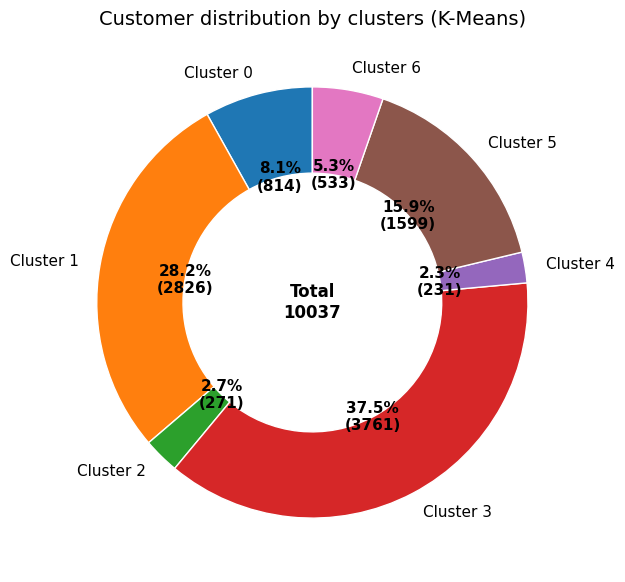

In [46]:
cluster_counts = df_mart['Cluster'].value_counts().sort_index()
cluster_percent = (cluster_counts / cluster_counts.sum() * 100).round(1)

plt.figure(figsize=(7, 7))
colors = plt.cm.tab10.colors
wedges, texts, autotexts = plt.pie(
    cluster_percent,
    labels=[f"Cluster {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df_mart)/100)})',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

plt.setp(autotexts, size=11, weight="bold", color="black")
plt.setp(texts, size=11)
plt.title("Customer distribution by clusters (K-Means)", fontsize=14)
plt.text(0, 0, f"Total\n{len(df_mart)}", ha='center', va='center', fontsize=12, weight='bold')
plt.show()

Most customers fall into clusters 3 (37.5%) and 1 (28.2%), indicating their predominance in the sample. The smallest clusters are clusters 2 and 4 (≈ 2–3% each), i.e. narrower or more specific customer groups

In [47]:
cluster_summary = (
    df_mart.groupby('Cluster')[
        ['DTI', 'age', 'Period_at_work_log', 'numAccountActiveAll_log',
         'FULL_AGE_CHILD_NUMBER', 'all_credits', 'max30days', 'max90days', 'ninety_in_a_year']
    ]
    .mean()
    .round(2)
)

cluster_summary['count'] = df_mart['Cluster'].value_counts().sort_index()
cluster_summary['share_%'] = (cluster_summary['count'] / df_mart.shape[0] * 100).round(1)

cluster_summary

,DTI,age,Period_at_work_log,numAccountActiveAll_log,FULL_AGE_CHILD_NUMBER,all_credits,max30days,max90days,ninety_in_a_year,count,share_%
Cluster,,,,,,,,,,,
0,0.32,32.68,3.39,0.36,0.36,2.36,0.57,0.95,0.00,817,8.1
1,0.38,35.36,3.89,1.10,1.46,5.01,0.09,0.99,0.00,2825,28.1
2,0.41,33.43,3.39,1.13,0.45,5.65,3.77,5.58,0.03,273,2.7
3,0.39,31.63,3.53,1.11,0.06,4.99,0.12,1.01,0.00,3752,37.4
4,0.38,36.50,3.60,1.07,0.52,7.43,0.80,1.61,1.00,235,2.3
5,0.40,47.23,4.37,1.10,0.16,4.99,0.14,0.98,0.00,1599,15.9
6,0.44,37.08,3.77,1.58,0.49,11.41,0.95,2.41,0.00,536,5.3


K-means clusters

Total clients: 10,037

Cluster 0 (Young beginners) 817 (8.1%)

* Age: around 33
* DTI: low (≈0.32)
* Work experience: short (around 2.5 years)
* Activity: low (few products), about 2–3 loans
* Delinquency risk: moderate (30/90 days ≈0.6/1.0)

Cluster 1 (Stable family clients) 2,825 (28.1%)

* Age: around 35–36
* DTI: medium (≈0.38)
* Work experience: steady (around 4 years)
* Activity: moderate, about 5 loans, around 1–2 children
* Delinquency risk: low

Cluster 2 (High-risk borrowers) 273 (2.7%)

* Age: around 33
* DTI: high (≈0.41)
* Work experience: average (around 2.5 years)
* Activity: high, around 5–6 loans
* Delinquency risk: high (30/90 days ≈3.8/5.6; frequent 90-day delinquencies)

Cluster 3 (Main young group) 3,752 (37.4%)

* Age: around 32
* DTI: medium (≈0.39)
* Work experience: around 2.8 years
* Activity: moderate, around 5 loans
* Delinquency risk: minimal

Cluster 4 (Multi-loan clients with delinquencies) 235 (2.3%)

* Age: around 36–37
* DTI: medium (≈0.38)
* Work experience: around 3 years
* Activity: high, about 7 loans
* Delinquency risk: noticeable (30/90 days ≈0.8/1.6; some 90-day cases per year)

Cluster 5 (Mature reliable clients) 1,599 (15.9%)

* Age: around 47
* DTI: medium (≈0.40)
* Work experience: long (around 6.5 years)
* Activity: moderate, around 5 loans
* Delinquency risk: low

Cluster 6 (Highly active clients with high load) 536 (5.3%)

* Age: around 37
* DTI: high (≈0.44)
* Work experience: around 3.5 years
* Activity: high (multiple products, around 11 loans)
* Delinquency risk: moderate (30/90 days ≈1.0/2.4)